In [39]:
from numpy import linspace, arange, zeros
from control import c2d, tf
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
import control
import control.matlab
from sympy import *

In [40]:
#Bloco F
T = 0.5
Fs = tf([5], [1,0])
Fz = c2d(Fs, T)
print('Fz = \n', Fz)

Fz = 
 
 2.5
-----
z - 1

dt = 0.5



In [41]:
#Bloco G
T = 0.5
Gs = tf([1,1], [1,4])
Gz = c2d(Gs, T)
print('Gz = \n', Gz)

Gz = 
 
z - 0.7838
----------
z - 0.1353

dt = 0.5



In [42]:
#Bloco GH
T = 0.5
GHs = tf([2,2], [1,4,0])
GHz = c2d(GHs, T)
print('GHz = \n', GHz)

GHz = 
 
  0.5742 z - 0.3581
----------------------
z^2 - 1.135 z + 0.1353

dt = 0.5



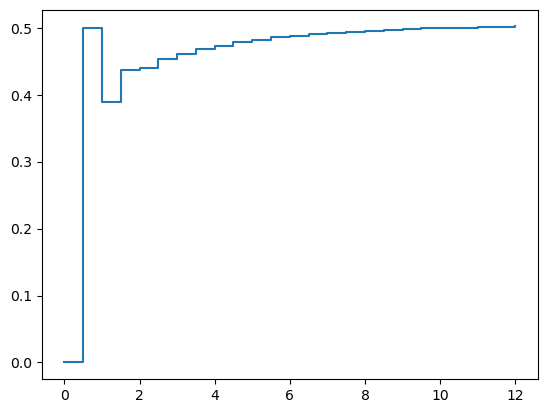

In [49]:
#recursiva
kmax = 25
t = T*arange(0,kmax)
r = T*arange(0,kmax)
c = np.zeros(kmax)
x = np.zeros(kmax)
v = np.zeros(kmax)
e = np.zeros(kmax)

#c[0] = e[0]
x[1] = 2.5*r[0] +x[0]
v[1] = 0.5742*e[0] + 1.135*v[0]
e[1] = r[1] - v[1]
c[1] = e[1] - 0.7838*e[0] + 0.1353*c[0]

for k in range(2, kmax):
    x[k] = 2.5*r[k-1] +x[k-1]
    v[k] = 0.5742*e[k-1] -0.3581*e[k-2]+ 1.135*v[k-1] -0.1353*v[k-2]
    e[k] = r[k] - v[k]
    c[k] = e[k] - 0.7838*e[k-1] + 0.1353*c[k-1]


plt.plot(t,c, ds='steps-post')

1 states have been removed from the model
FTMFa = 
 
z^2 - 1.784 z + 0.7838
-----------------------
z^2 - 0.5611 z - 0.2227

dt = 0.5



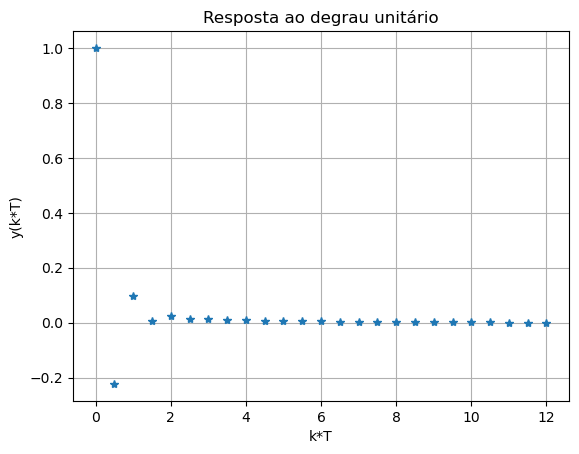

In [44]:
#b
FTMFa = control.minreal(Gz/(1+GHz));     # não é possivel usar o comando feedback
print("FTMFa = \n",FTMFa)     
                      
x2, y = control.step_response(FTMFa, t);
plt.figure()
plt.plot(x2, y,'*')
plt.title("Resposta ao degrau unitário")
plt.xlabel("k*T")
plt.ylabel("y(k*T)")
plt.grid(True)
plt.show()

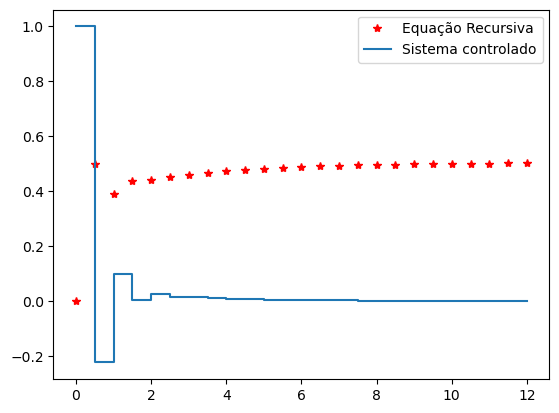

In [51]:
#plt.plot(t, x, ds='steps-post', label="Ação de controle")
plt.plot(t, c, 'r*', label="Equação Recursiva")
plt.plot(x2, y, ds='steps-post', label= "Sistema controlado")
plt.legend()
plt.show()

In [46]:
#c -> erro em regime permanente
aux = control.minreal(control.tf([2],[1, 0],T)*Gz);
[[n]],[[d]]= control.tfdata(aux);

kv = (np.polyval(n, 1)/np.polyval(d, 1))/T   #  substituindo 1 em aux
ess = 1/kv;

print("ess = \n",ess)

0 states have been removed from the model
ess = 
 1.0000000000000002
